In [56]:
%matplotlib inline
from deuces import Deck, Card, Evaluator
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import log
import operator as op
from datetime import timedelta, datetime
import pathos.multiprocessing as mp
from pathos.multiprocessing import Pool

In [68]:
evaluator = Evaluator()

c0 = Card.new('Ah')
c1 = Card.new('As')
hand = {c0, c1}
cards = set(Deck.GetFullDeck()) - hand

len(cards), Card.int_to_str(c0), Card.int_to_str(c1)

(50, 'Ah', 'As')

In [70]:
my_boards = [list(board) for board in it.combinations(cards, 3)]
my_scores = [evaluator.evaluate(board, list(hand)) for board in my_boards]

op_boards = [list(board) for board in it.combinations(cards, 5)]
op_scores = [evaluator.evaluate(board[:3], board[3:]) for board in op_boards]

len(my_scores), len(op_scores)

(19600, 2118760)

In [71]:
my_bins, my_edges = np.histogram(my_scores, bins=100)
my_bins = np.asarray(my_bins, dtype=np.float32)
my_bins = my_bins/len(my_scores)
my_edges = np.asarray(my_edges[:-1], dtype=np.float32)

op_bins, op_edges = np.histogram(op_scores, bins=100)
op_bins = np.asarray(op_bins, dtype=np.float32)
op_bins = op_bins/len(op_scores)
op_edges = np.asarray(op_edges[:-1], dtype=np.float32)

m = max(max(my_edges), max(op_edges))
my_edges = my_edges/m
op_edges = op_edges/m

len(my_bins), len(op_bins)

(100, 100)

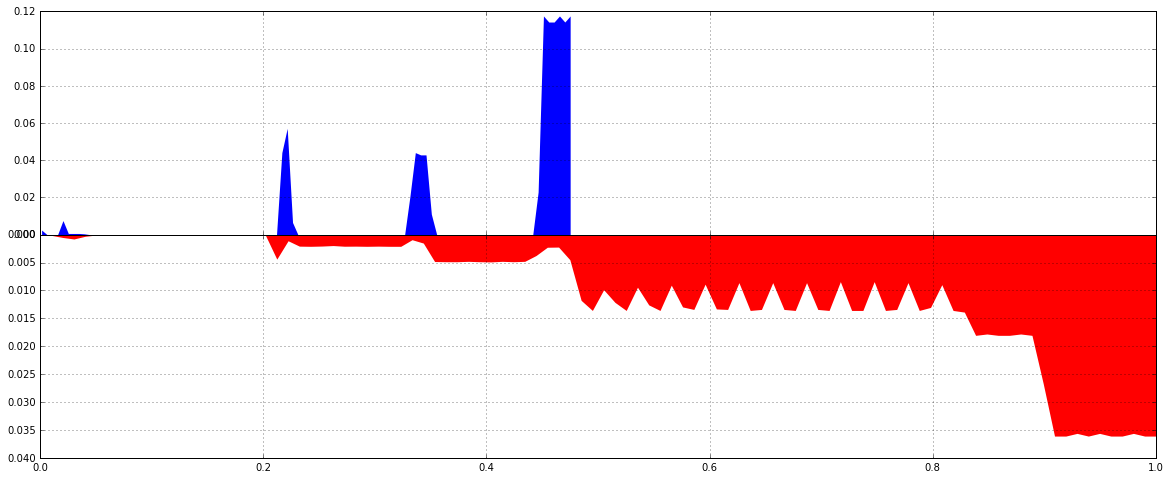

In [72]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, figsize=(20,8))

ax1.fill_between(my_edges, my_bins, linewidth=0, interpolate=False)
ax1.grid(True)

ax2.fill_between(op_edges, op_bins, linewidth=0, color='red', interpolate=False)
ax2.invert_yaxis()
ax2.grid(True)

f.subplots_adjust(hspace=0)

In [ ]:
np.median(my_scores), np.median(op_scores)

In [62]:
card_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 
         83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 
         179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239]

hands = [reduce(op.mul, hand) for hand in it.combinations(card_primes, 5)]

In [ ]:
suits = list('hdcs')
ranks = list('A23456789TJQK')
card_labels = ['%s%s' % (r, s) for s, r in it.product(suits, ranks)]
card_objs = [Card.new(label) for label in card_labels]
hand_objs = [hand for hand in it.combinations(card_objs, 5)]
hand_rates = [evaluator.evaluate(hand[:3], hand[3:]) for hand in hand_objs]
len(card_objs), len(hand_rates)

In [ ]:
index = 234687
card_indices = [card_primes.index(card) for card in card_primes if hands[index] % card == 0]
labels = [card_labels[i] for i in card_indices]
cs = [Card.new(l) for l in labels]
hand_rates[index], hands[index], card_indices, labels, cs, evaluator.evaluate(cs[:3], cs[3:])

In [ ]:
min(hand_rates)

In [ ]:
deck = #
sample_size = 5 - len(board)

space = populate_with_combinations(deck, dims=(2, sample_size), append=board|hand)

me = space[...,2:]
me = np.apply_along_axis(score, axis=-1)
me = np.apply_along_axis(bincount, axis=-1)
me = np.median(me)

op = space[...,:-2]
op = np.apply_along_axis(score, axis=-1)
op = np.apply_along_axis(bincount, axis=-1)
op = np.median(op)

In [57]:
deck = {13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 
         83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 
         179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239}
hand = {2, 3}
board = {5, 7, 11}
scores = lambda x: 12

def mul(iterable):
    return reduce(op.mul, iterable)

def populate(src, dims, state=1, parallel=True, exclude_dim=True):
    dim, dims = dims[0], dims[1:]
    
    if len(dims) == 0:
        return np.asarray([scores(state*mul(c)) for c in it.combinations(src, dim)])
    
    def populate_predicate(c):
        s = state if exclude_dim else state*mul(c)
        return populate(src-set(c), dims, s, parallel=False, exclude_dim=False)
    
    mapper = mp.Pool(mp.cpu_count()).map if parallel else map
    a = mapper(populate_predicate, it.combinations(src, dim))
    
    return np.asarray(a)

start = datetime.now()
mine = populate(deck, dims=(2,2), state=mul(hand|board), parallel=True, exclude_dim=True)
his = populate(deck, dims=(2,), state=mul(board), parallel=True, exclude_dim=False)
finish = datetime.now()

print mine.shape, his.shape, finish-start

(1081, 990) (1081,) 0:00:00.243032


In [66]:
start = datetime.now()
space = populate(card_primes, dims=(7,), parallel=True, exclude_dim=True)
finish = datetime.now()

print space.shape, finish-start

(133784560,) 0:02:10.988472


In [67]:
space[:10]

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12])